In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

In [274]:
df = pd.read_csv('spaceship-titanic/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [275]:
df.shape

(8693, 14)

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [277]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


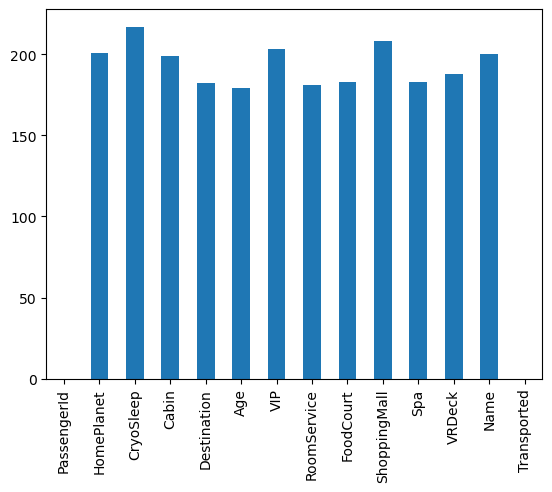

In [278]:
df.isnull().sum().plot.bar()
plt.show()

In [279]:
# col from RoomService to VRDeck
col = df.loc[:,'RoomService':'VRDeck'].columns
df.groupby('VIP')[col].mean()
df.groupby('VIP')[col].std()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,
False,644.922614,1505.278247,610.900749,1127.555366,1084.678230
True,1098.363713,3758.336442,587.449429,1622.153873,2453.060817


In [280]:
df.groupby('CryoSleep')[col].count()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
False,5328,5329,5335,5326,5320
True,2969,2967,2941,2972,2975


In [281]:
df.groupby('CryoSleep')[col].mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
False,350.146772,713.004316,270.586504,486.09294,475.716165
True,0.000000,0.000000,0.000000,0.00000,0.000000


In [282]:
df.groupby('CryoSleep')[col].std()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
False,803.08032,1970.547985,741.756155,1396.233751,1404.174304
True,0.00000,0.000000,0.000000,0.000000,0.000000


In [283]:
temp = df['CryoSleep'] == True
df.loc[temp, col] = 0.0

In [284]:
for c in col:
    for val in [True, False]:
        temp = df['VIP'] == val
        k = df[temp][c].mean()  # Calculate the mean for the specific column 'c'
        df.loc[temp, c] = df.loc[temp, c].fillna(str(k))  # Convert k to a string before filling NaN values


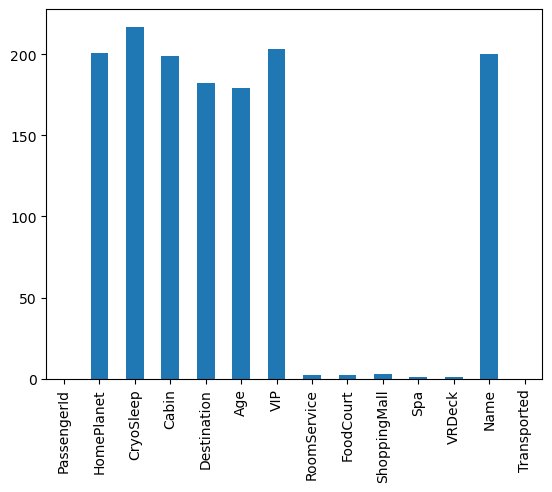

In [285]:
df.isnull().sum().plot.bar()
plt.show()

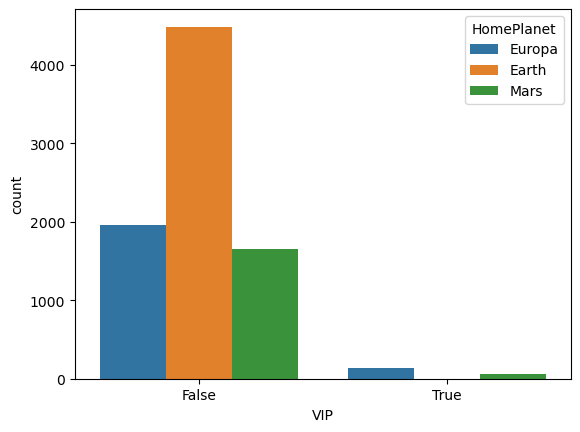

In [286]:
sns.countplot(data=df, x='VIP',
            hue='HomePlanet')
plt.show()


In [287]:
col = 'HomePlanet'
temp = df['VIP'] == False
df.loc[temp, col] = df.loc[temp, col].fillna('Earth')

temp = df['VIP'] == True
df.loc[temp, col] = df.loc[temp, col].fillna('Europa')


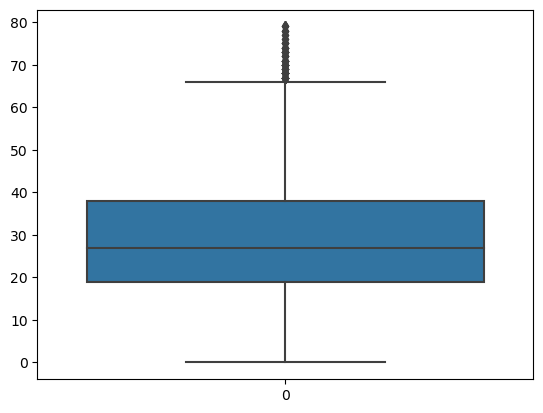

In [288]:
sns.boxplot(df['Age'])
plt.show()

In [289]:
temp = df[df['Age'] < 61]['Age'].mean()
df['Age'] = df['Age'].fillna(temp)


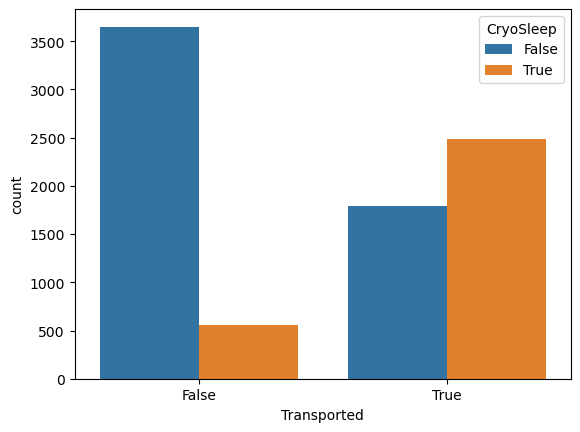

In [290]:
sns.countplot(data=df,
            x='Transported',
            hue='CryoSleep')
plt.show()


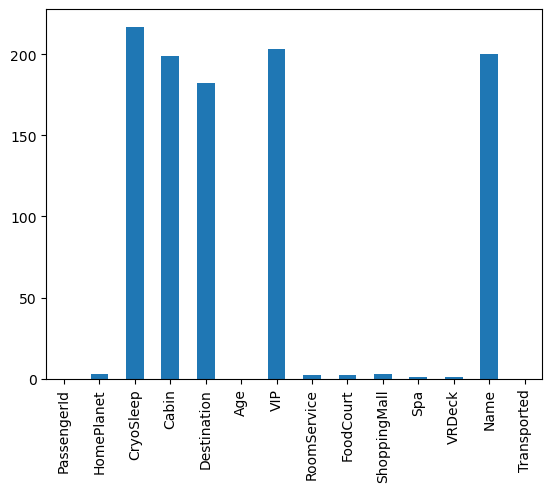

In [291]:
df.isnull().sum().plot.bar()
plt.show()


In [292]:
for col in df.columns:
    # Check for null values presence
    if df[col].isnull().sum() == 0:
        continue

    # If the data type is categorical filling by mode.
    if df[col].dtype == object or df[col].dtype == bool:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Else by mean
    else:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()


0

In [293]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [294]:
new = df["PassengerId"].str.split("_", n=1, expand=True)
df["RoomNo"] = new[0].astype(int)
df["PassengerNo"] = new[1].astype(int)

df.drop(['PassengerId', 'Name'],
        axis=1, inplace=True)


In [295]:
data = df['RoomNo']
for i in range(df.shape[0]):
    temp = data == data[i]
    df['PassengerNo'][i] = (temp).sum()


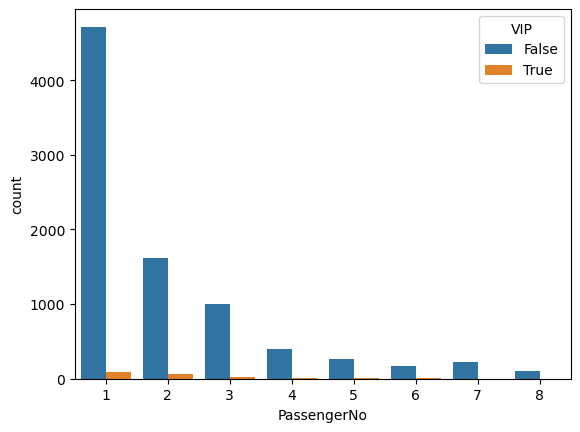

In [296]:
df.drop(['RoomNo'], axis=1,
        inplace=True)

sns.countplot(data=df,
        x = 'PassengerNo',
            hue='VIP')
plt.show()


In [297]:
new = df["Cabin"].str.split("/", n=2, expand=True)
data["F1"] = new[0]
df["F2"] = new[1].astype(int)
df["F3"] = new[2]

df.drop(['Cabin'], axis=1,
        inplace=True)


In [299]:
# df['LeasureBill'] = df['RoomService'] + df['FoodCourt']\
# + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
# df.head()

In [300]:
df['LeasureBill'] = df['RoomService'].astype(float) + df['FoodCourt'].astype(float) + \
+ df['ShoppingMall'].astype(float) + df['Spa'].astype(float) + df['VRDeck'].astype(float)

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerNo,F2,F3,LeasureBill
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,0,S,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,0,S,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1,S,1091.0


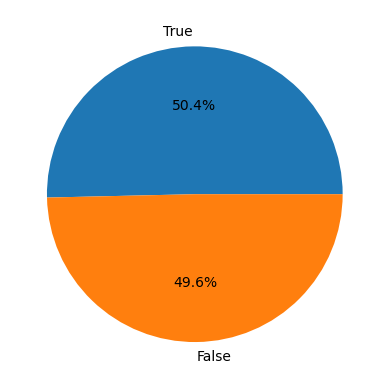

In [301]:
x = df['Transported'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   object 
 6   FoodCourt     8693 non-null   object 
 7   ShoppingMall  8693 non-null   object 
 8   Spa           8693 non-null   object 
 9   VRDeck        8693 non-null   object 
 10  Transported   8693 non-null   bool   
 11  PassengerNo   8693 non-null   int64  
 12  F2            8693 non-null   int64  
 13  F3            8693 non-null   object 
 14  LeasureBill   8693 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(8)
memory usage: 840.6+ KB


In [316]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerNo,F2,F3,LeasureBill
0,1,0,2,39,0,0.0,0.0,0.0,0.0,0.0,False,1,0,P,0.0
1,0,0,2,24,0,109.0,9.0,25.0,549.0,44.0,True,1,0,S,736.0
2,1,0,2,58,1,43.0,3576.0,0.0,6715.0,49.0,False,2,0,S,10383.0
3,1,0,2,33,0,0.0,1283.0,371.0,3329.0,193.0,False,2,0,S,5176.0
4,0,0,2,16,0,303.0,70.0,151.0,565.0,2.0,True,1,1,S,1091.0


In [318]:
df['RoomService'] = df['RoomService'].astype(float)
df['FoodCourt'] = df['FoodCourt'].astype(float)
df['ShoppingMall'] = df['ShoppingMall'].astype(float)
df['Spa'] = df['Spa'].astype(float)
df['VRDeck'] = df['VRDeck'].astype(float)


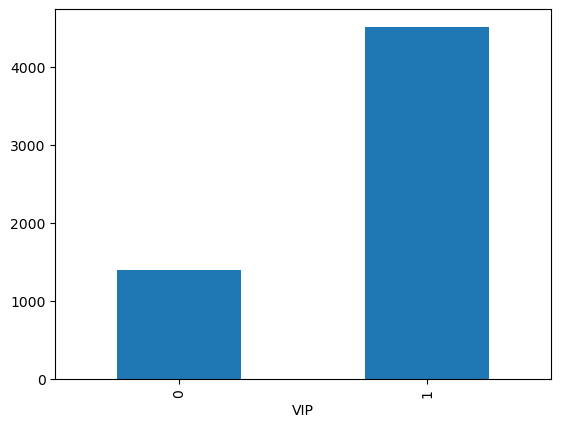

In [327]:
df.groupby('VIP').mean()['LeasureBill'].plot.bar()
plt.show()


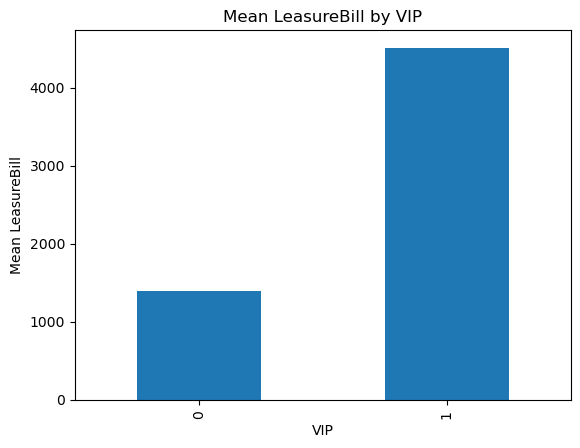

In [328]:
import numpy as np

# Replace non-numeric values with NaN
df['LeasureBill'] = pd.to_numeric(df['LeasureBill'], errors='coerce')

# Now, you can calculate the mean without errors
mean_leasurebill = df.groupby('VIP')['LeasureBill'].mean()

# Plot the mean values
mean_leasurebill.plot.bar()
plt.xlabel('VIP')
plt.ylabel('Mean LeasureBill')
plt.title('Mean LeasureBill by VIP')
plt.show()


In [319]:
for col in df.columns:
    print(f"{df[col].name}: {df[col].dtype}")
    
    # encode them
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
  
    # In case of boolean data type 
    # convert them to binary
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)    

df.head()


HomePlanet: int64
CryoSleep: int64
Destination: int64
Age: int64
VIP: int64
RoomService: float64
FoodCourt: float64
ShoppingMall: float64
Spa: float64
VRDeck: float64
Transported: bool
PassengerNo: int64
F2: int64
F3: object
LeasureBill: float64


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerNo,F2,F3,LeasureBill
0,1,0,2,39,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0.0
1,0,0,2,24,0,109.0,9.0,25.0,549.0,44.0,1,1,0,1,736.0
2,1,0,2,58,1,43.0,3576.0,0.0,6715.0,49.0,0,2,0,1,10383.0
3,1,0,2,33,0,0.0,1283.0,371.0,3329.0,193.0,0,2,0,1,5176.0
4,0,0,2,16,0,303.0,70.0,151.0,565.0,2.0,1,1,1,1,1091.0


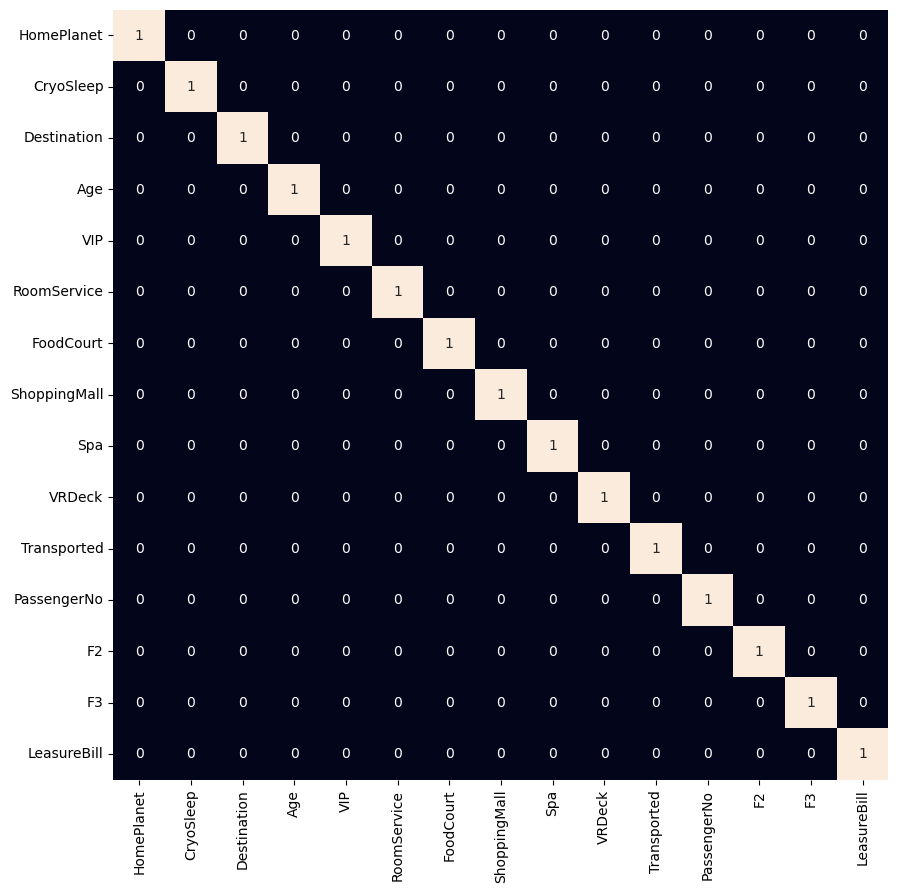

In [320]:
# display corellation only if it is more than 0.8
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()>0.8,
        annot=True,
        cbar=False)
plt.show()


From the above heat map, we can see that there are no highly correlated features which implies we are good to go for our model development part.

In [321]:
features = df.drop(['Transported'], axis=1)
target = df.Transported

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                    test_size=0.1,
                                    random_state=22)

X_train.shape, X_val.shape


((7823, 14), (870, 14))

In [322]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


LogisticRegression() : 
Training Accuracy :  0.8690439908525031
Validation Accuracy :  0.8571829821511849

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  0.9825758707897084
Validation Accuracy :  0.8748463136473481

SVC(probability=True) : 
Training Accuracy :  0.8887629

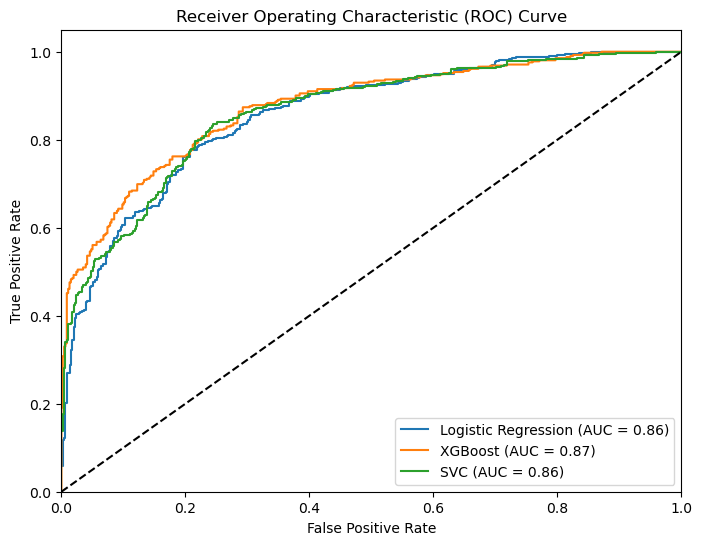

In [323]:

models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]
model_names = ['Logistic Regression', 'XGBoost', 'SVC']

plt.figure(figsize=(8, 6))

for i in range(len(models)):
    models[i].fit(X_train, Y_train)

    train_preds = models[i].predict_proba(X_train)[:, 1]
    train_auc = ras(Y_train, train_preds)

    val_preds = models[i].predict_proba(X_val)[:, 1]
    val_auc = ras(Y_val, val_preds)

    fpr, tpr, _ = roc_curve(Y_val, val_preds)
    
    print(f'{models[i]} : ')
    print('Training Accuracy : ', ras(Y_train, train_preds))
    print('Validation Accuracy : ', ras(Y_val, val_preds))
    print()    

    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {val_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [324]:
# # Create a threshold of 0.5
# threshold = 0.5

# # Convert Y_val to a binary variable
# Y_val_binary = np.where(Y_val > threshold, 1, 0)

<Figure size 1500x500 with 0 Axes>

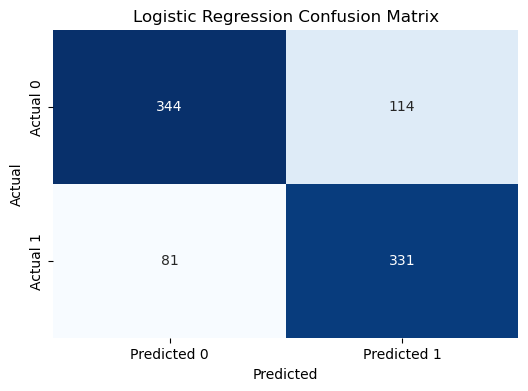

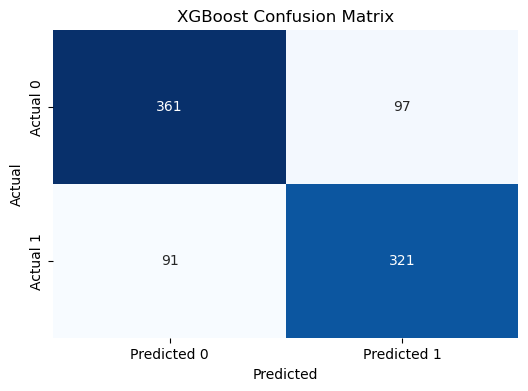

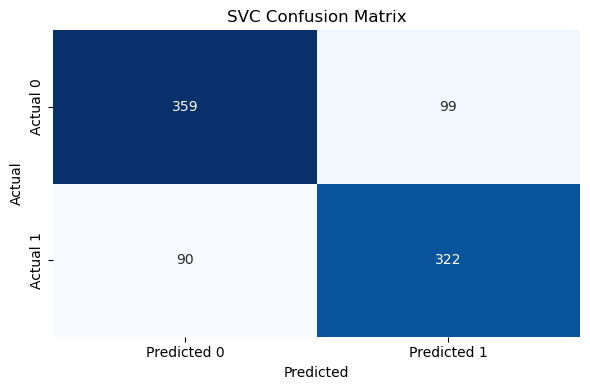

In [325]:
# Define the models and their names
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]
model_names = ['Logistic Regression', 'XGBoost', 'SVC']

# Create a figure to display the confusion matrices
plt.figure(figsize=(15, 5))

for i in range(len(models)):
    # Fit the model
    models[i].fit(X_train, Y_train)

    # Calculate ROC AUC for validation data
    val_preds = models[i].predict_proba(X_val)[:, 1]

    # Create a confusion matrix for validation data
    val_preds_binary = (val_preds > 0.5).astype(int)
    confusion = confusion_matrix(Y_val, val_preds_binary)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_names[i]} Confusion Matrix')

plt.tight_layout()
plt.show()